In [1]:
from experiment import Experiment
import torch
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
                      'Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols',
                      'Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines',
                      'Proline'],
    class_var = 'class'
)

In [3]:
exp = Experiment('data/wine.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=1e-3,
                 weight_decay=0.0,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20])

In [19]:
exp.data.shape

(178, 14)

In [20]:
%time clustering_scores = exp.test_clustering_performance()

#Init Bin = 10
Learned #Bin by Variables = [6, 3, 4, 5, 4, 2, 2, 2, 4, 8, 2, 3, 2]
#Init Bin = 15
Learned #Bin by Variables = [9, 4, 13, 5, 14, 4, 4, 5, 8, 4, 2, 7, 4]
#Init Bin = 20
Learned #Bin by Variables = [10, 11, 15, 12, 16, 4, 3, 6, 15, 14, 8, 4, 10]
CPU times: user 2min, sys: 34.2 s, total: 2min 34s
Wall time: 2min 1s


In [21]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 13, NMI = 0.4288
agglomerative, #Cols = 13, NMI = 0.4161


In [22]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 13, NMI = 0.8759
agglomerative, #Cols = 13, NMI = 0.7865


In [23]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.5555
#Bins = 3, #Cols = 39, #NMI = 0.6464
#Bins = 4, #Cols = 52, #NMI = 0.7319
#Bins = 5, #Cols = 65, #NMI = 0.7915
#Bins = 6, #Cols = 78, #NMI = 0.7812
#Bins = 7, #Cols = 91, #NMI = 0.8205
#Bins = 8, #Cols = 104, #NMI = 0.7872
#Bins = 9, #Cols = 117, #NMI = 0.8507
#Bins = 10, #Cols = 130, #NMI = 0.7573
#Bins = 11, #Cols = 143, #NMI = 0.7774
#Bins = 12, #Cols = 156, #NMI = 0.7641
#Bins = 13, #Cols = 169, #NMI = 0.7589
#Bins = 14, #Cols = 182, #NMI = 0.7782
#Bins = 15, #Cols = 195, #NMI = 0.8507
#Bins = 16, #Cols = 208, #NMI = 0.7519
#Bins = 17, #Cols = 221, #NMI = 0.8561
#Bins = 18, #Cols = 234, #NMI = 0.7717
#Bins = 19, #Cols = 247, #NMI = 0.8187
#Bins = 20, #Cols = 260, #NMI = 0.7358
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.5865
#Bins = 3, #Cols = 39, #NMI = 0.7459
#Bins = 4, #Cols = 52, #NMI = 0.7172
#Bins = 5, #Cols = 65, #NMI = 0.8259
#Bins = 6, #Cols = 78, #NMI = 0.7373
#Bins = 7, #Cols = 91, #NMI = 0.8222
#Bins = 8, #Cols = 104, #NMI =

In [24]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 26, #NMI = 0.7021
#Bins = 3, #Cols = 39, #NMI = 0.7944
#Bins = 4, #Cols = 52, #NMI = 0.9011
#Bins = 5, #Cols = 65, #NMI = 0.8316
#Bins = 6, #Cols = 78, #NMI = 0.8610
#Bins = 7, #Cols = 91, #NMI = 0.8473
#Bins = 8, #Cols = 104, #NMI = 0.8330
#Bins = 9, #Cols = 117, #NMI = 0.8363
#Bins = 10, #Cols = 130, #NMI = 0.8615
#Bins = 11, #Cols = 143, #NMI = 0.7838
#Bins = 12, #Cols = 156, #NMI = 0.8507
#Bins = 13, #Cols = 169, #NMI = 0.7093
#Bins = 14, #Cols = 182, #NMI = 0.7966
#Bins = 15, #Cols = 195, #NMI = 0.7576
#Bins = 16, #Cols = 208, #NMI = 0.8139
#Bins = 17, #Cols = 221, #NMI = 0.7515
#Bins = 18, #Cols = 232, #NMI = 0.7745
#Bins = 19, #Cols = 247, #NMI = 0.5782
#Bins = 20, #Cols = 256, #NMI = 0.7136
agglomerative
#Bins = 2, #Cols = 26, #NMI = 0.6716
#Bins = 3, #Cols = 39, #NMI = 0.7282
#Bins = 4, #Cols = 52, #NMI = 0.6903
#Bins = 5, #Cols = 65, #NMI = 0.7362
#Bins = 6, #Cols = 78, #NMI = 0.7067
#Bins = 7, #Cols = 91, #NMI = 0.8630
#Bins = 8, #Cols = 104, #NMI =

In [25]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 47, NMI = 0.6879
#Init Bins = 15, #Cols = 83, NMI = 0.8014
#Init Bins = 20, #Cols = 128, NMI = 0.7556
agglomerative
#Init Bins = 10, #Cols = 47, NMI = 0.6971
#Init Bins = 15, #Cols = 83, NMI = 0.8212
#Init Bins = 20, #Cols = 128, NMI = 0.6706


In [26]:
%time clf_scores = exp.test_classification_performance(cv=3)

#Init Bin = 10
Learned #Bin by Variables = [7, 6, 6, 2, 8, 2, 2, 7, 2, 8, 4, 4, 6]
#Init Bin = 15
Learned #Bin by Variables = [8, 11, 12, 8, 11, 4, 13, 11, 2, 12, 7, 7, 5]
#Init Bin = 20
Learned #Bin by Variables = [17, 14, 9, 15, 19, 18, 4, 9, 17, 12, 14, 6, 17]
#Init Bin = 10
Learned #Bin by Variables = [8, 3, 7, 5, 5, 2, 2, 7, 2, 8, 4, 3, 7]
#Init Bin = 15
Learned #Bin by Variables = [8, 10, 8, 3, 10, 5, 11, 6, 6, 6, 4, 7, 4]
#Init Bin = 20
Learned #Bin by Variables = [8, 10, 18, 16, 16, 6, 9, 6, 16, 13, 8, 11, 10]
#Init Bin = 10
Learned #Bin by Variables = [7, 2, 7, 8, 4, 2, 2, 2, 4, 8, 2, 3, 2]
#Init Bin = 15
Learned #Bin by Variables = [10, 9, 10, 11, 11, 9, 2, 2, 7, 8, 2, 7, 3]
#Init Bin = 20
Learned #Bin by Variables = [7, 17, 11, 11, 8, 17, 2, 13, 13, 15, 15, 15, 17]
CPU times: user 5min 31s, sys: 4.29 s, total: 5min 35s
Wall time: 5min 34s


In [27]:
exp.print_classification_scores(clf_scores, method='dummy_only')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.949 (+/- 0.083)


In [28]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

DT performance
#cols = 13.0, Accuracy = 0.888 (+/- 0.033)
LR performance
#cols = 13.0, Accuracy = 0.989 (+/- 0.016)


In [29]:
exp.print_classification_scores(clf_scores, method='equal_width')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.848 (+/- 0.025)
#Bins = 3, #Avg Cols = 39.0, Accuracy = 0.888 (+/- 0.041)
#Bins = 4, #Avg Cols = 52.0, Accuracy = 0.910 (+/- 0.068)
#Bins = 5, #Avg Cols = 65.0, Accuracy = 0.910 (+/- 0.043)
#Bins = 6, #Avg Cols = 78.0, Accuracy = 0.876 (+/- 0.057)
#Bins = 7, #Avg Cols = 91.0, Accuracy = 0.848 (+/- 0.097)
#Bins = 8, #Avg Cols = 104.0, Accuracy = 0.854 (+/- 0.082)
#Bins = 9, #Avg Cols = 117.0, Accuracy = 0.876 (+/- 0.017)
#Bins = 10, #Avg Cols = 130.0, Accuracy = 0.854 (+/- 0.081)
#Bins = 11, #Avg Cols = 143.0, Accuracy = 0.894 (+/- 0.086)
#Bins = 12, #Avg Cols = 156.0, Accuracy = 0.848 (+/- 0.053)
#Bins = 13, #Avg Cols = 169.0, Accuracy = 0.815 (+/- 0.123)
#Bins = 14, #Avg Cols = 182.0, Accuracy = 0.843 (+/- 0.031)
#Bins = 15, #Avg Cols = 195.0, Accuracy = 0.848 (+/- 0.074)
#Bins = 16, #Avg Cols = 208.0, Accuracy = 0.893 (+/- 0.040)
#Bins = 17, #Avg Cols = 221.0, Accuracy = 0.792 (+/- 0.060)
#Bins = 18, #Avg Cols = 234.0, Accuracy

In [30]:
exp.print_classification_scores(clf_scores, method='equal_freq')

DT performance
#Bins = 2, #Avg Cols = 26.0, Accuracy = 0.888 (+/- 0.041)
#Bins = 3, #Avg Cols = 39.0, Accuracy = 0.910 (+/- 0.056)
#Bins = 4, #Avg Cols = 52.0, Accuracy = 0.831 (+/- 0.147)
#Bins = 5, #Avg Cols = 65.0, Accuracy = 0.888 (+/- 0.082)
#Bins = 6, #Avg Cols = 78.0, Accuracy = 0.854 (+/- 0.077)
#Bins = 7, #Avg Cols = 91.0, Accuracy = 0.910 (+/- 0.014)
#Bins = 8, #Avg Cols = 104.0, Accuracy = 0.854 (+/- 0.044)
#Bins = 9, #Avg Cols = 117.0, Accuracy = 0.815 (+/- 0.083)
#Bins = 10, #Avg Cols = 130.0, Accuracy = 0.843 (+/- 0.170)
#Bins = 11, #Avg Cols = 143.0, Accuracy = 0.882 (+/- 0.084)
#Bins = 12, #Avg Cols = 156.0, Accuracy = 0.803 (+/- 0.158)
#Bins = 13, #Avg Cols = 169.0, Accuracy = 0.843 (+/- 0.112)
#Bins = 14, #Avg Cols = 181.66666666666666, Accuracy = 0.815 (+/- 0.072)
#Bins = 15, #Avg Cols = 195.0, Accuracy = 0.792 (+/- 0.126)
#Bins = 16, #Avg Cols = 207.66666666666666, Accuracy = 0.787 (+/- 0.094)
#Bins = 17, #Avg Cols = 220.0, Accuracy = 0.877 (+/- 0.103)
#Bins = 18, #

In [31]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

DT performance
#Init Bins = 10, #Avg Cols = 60.0, Accuracy = 0.876 (+/- 0.057)
#Init Bins = 15, #Avg Cols = 96.66666666666667, Accuracy = 0.820 (+/- 0.040)
#Init Bins = 20, #Avg Cols = 159.66666666666666, Accuracy = 0.820 (+/- 0.085)
LR performance
#Init Bins = 10, #Avg Cols = 60.0, Accuracy = 0.972 (+/- 0.042)
#Init Bins = 15, #Avg Cols = 96.66666666666667, Accuracy = 0.949 (+/- 0.001)
#Init Bins = 20, #Avg Cols = 159.66666666666666, Accuracy = 0.938 (+/- 0.041)
NB performance
#Init Bins = 10, #Avg Cols = 60.0, Accuracy = 0.949 (+/- 0.028)
#Init Bins = 15, #Avg Cols = 96.66666666666667, Accuracy = 0.966 (+/- 0.027)
#Init Bins = 20, #Avg Cols = 159.66666666666666, Accuracy = 0.955 (+/- 0.041)


In [4]:
exp.data.shape

(178, 14)

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=100, lr=1e-2, weight_decay=0.0, verbose=True)
sb.fit(exp.data, n_init_bins=6)

>>> Epoch = 1, Loss = 0.4524633586406708
[5, 4, 5, 4, 4, 5, 4, 6, 5, 4, 4, 4, 4] 0.703995649231
>>> Epoch = 2, Loss = 0.42793381214141846
[5, 4, 5, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4] 0.658849802352
>>> Epoch = 3, Loss = 0.4280748665332794
[4, 4, 5, 4, 4, 4, 4, 4, 3, 2, 4, 3, 6] 0.674942162232
>>> Epoch = 4, Loss = 0.42168641090393066
[4, 4, 5, 4, 4, 4, 4, 4, 3, 2, 4, 3, 6] 0.670988363329
>>> Epoch = 5, Loss = 0.42132189869880676
[3, 5, 6, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4] 0.736559049429
>>> Epoch = 6, Loss = 0.4069458246231079
[3, 3, 6, 2, 2, 3, 3, 2, 2, 2, 4, 2, 4] 0.714580483904
>>> Epoch = 7, Loss = 0.41034671664237976
[2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 4] 0.712110912196
>>> Epoch = 8, Loss = 0.42380276322364807
[2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2] 0.729682246565
>>> Epoch = 9, Loss = 0.4171708822250366
[2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 5, 2] 0.734700567184
>>> Epoch = 10, Loss = 0.401447594165802
[2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 5, 2] 0.733161611106
>>> Epoch = 11, Loss = 0.4138732850

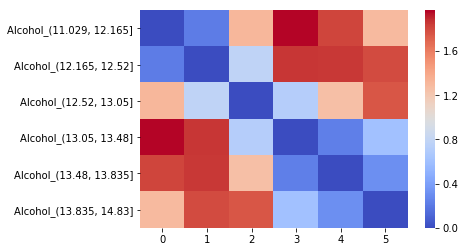

In [5]:
sb.plot_pairwise_distance_between_bins('Alcohol')

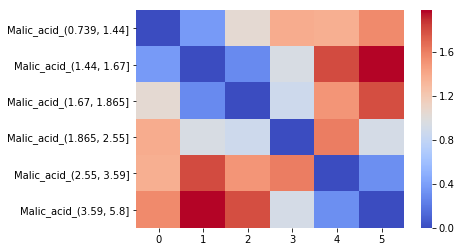

In [6]:
sb.plot_pairwise_distance_between_bins('Malic_acid')

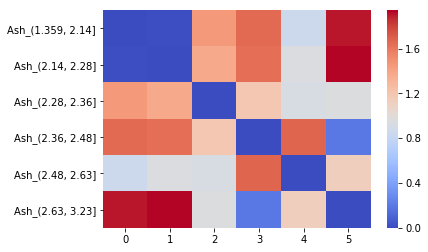

In [7]:
sb.plot_pairwise_distance_between_bins('Ash')

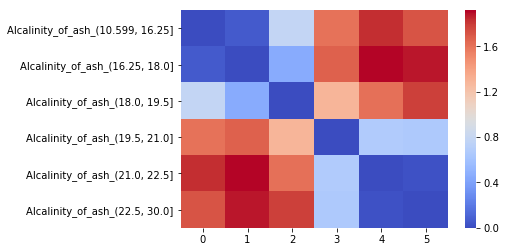

In [8]:
sb.plot_pairwise_distance_between_bins('Alcalinity_of_ash')

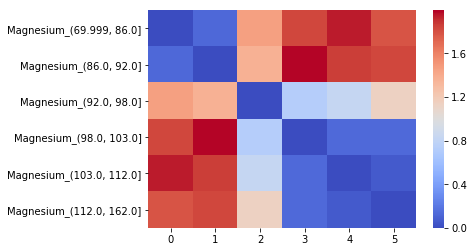

In [9]:
sb.plot_pairwise_distance_between_bins('Magnesium')

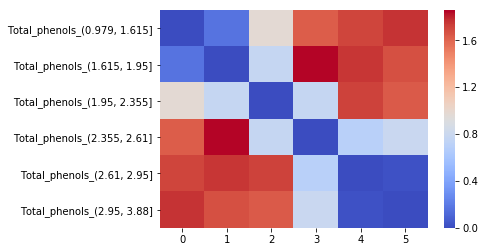

In [10]:
sb.plot_pairwise_distance_between_bins('Total_phenols')

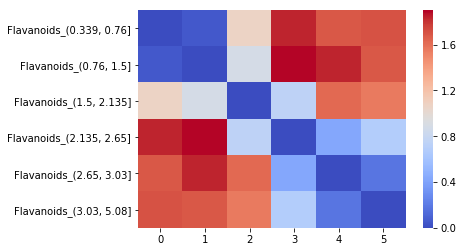

In [11]:
sb.plot_pairwise_distance_between_bins('Flavanoids')

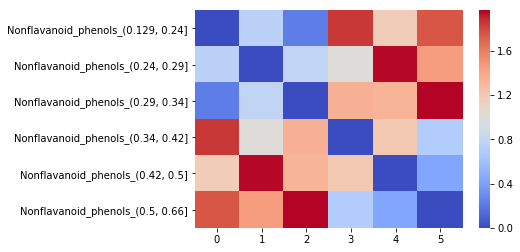

In [12]:
sb.plot_pairwise_distance_between_bins('Nonflavanoid_phenols')

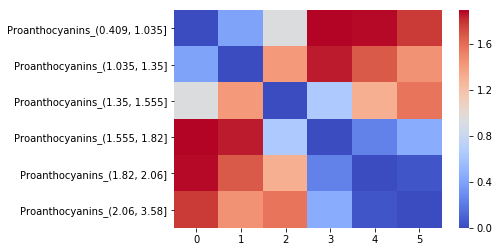

In [13]:
sb.plot_pairwise_distance_between_bins('Proanthocyanins')

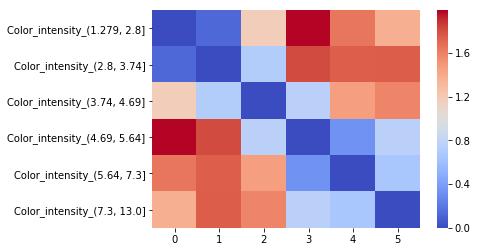

In [14]:
sb.plot_pairwise_distance_between_bins('Color_intensity')

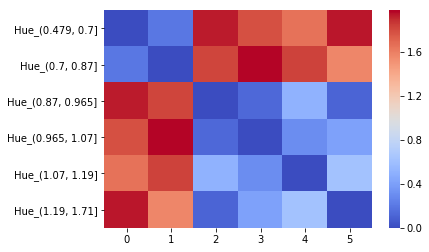

In [15]:
sb.plot_pairwise_distance_between_bins('Hue')

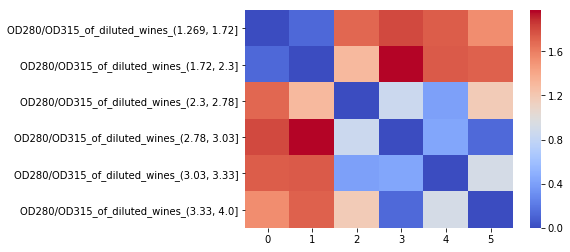

In [16]:
sb.plot_pairwise_distance_between_bins('OD280/OD315_of_diluted_wines')

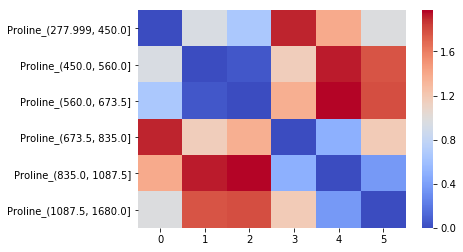

In [17]:
sb.plot_pairwise_distance_between_bins('Proline')

In [18]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Alcohol
['(11.029, 13.05]', '(13.05, 14.83]']
Malic_acid
['(0.739, 2.55]', '(2.55, 5.8]']
Ash
['(1.359, 2.28]', '(2.28, 2.48]', '(2.48, 2.63]', '(2.63, 3.23]']
Alcalinity_of_ash
['(10.599, 19.5]', '(19.5, 30.0]']
Magnesium
['(69.999, 92.0]', '(92.0, 162.0]']
Total_phenols
['(0.979, 2.355]', '(2.355, 3.88]']
Flavanoids
['(0.339, 2.135]', '(2.135, 5.08]']
Nonflavanoid_phenols
['(0.129, 0.34]', '(0.34, 0.66]']
Proanthocyanins
['(0.409, 1.555]', '(1.555, 3.58]']
Color_intensity
['(1.279, 4.69]', '(4.69, 13.0]']
Hue
['(0.479, 0.87]', '(0.87, 1.71]']
OD280/OD315_of_diluted_wines
['(1.269, 2.3]', '(2.3, 4.0]']
Proline
['(277.999, 673.5]', '(673.5, 1680.0]']
